### Author Name : Ashutosh Lande

### TASK- Next Word Prediction using Tensorflow and Keras

Using Tensorflow and Keras library train a RNN, to predict the next word.

Dataset link : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

Most of the keyboards in smartphones give next word prediction features; google also uses next word prediction based on our browsing history. So a preloaded data is also stored in the keyboard function of our smartphones to predict the next word correctly. In this article, I will train a Deep Learning model for next word prediction using Python. I will use the Tensorflow and Keras library in Python for next word prediction model.

## Importing Libraries

In [1]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import warnings as wg
wg.filterwarnings("ignore") 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

## Loading the data

In [6]:
#Loading the data
text = open(r"C:\Users\ashutosh_lande\Downloads\1661-0.txt", encoding="utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [7]:

#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [8]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [9]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

'e'

In [10]:
#printing one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [11]:
#printing one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [12]:
# checking shape
X.shape

(193950, 40, 73)

In [13]:
# checking shape
y.shape

(193950, 73)

### Creating the model


In [14]:
# Creating the model
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

## Model summary


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1148000   
                                                                 
 dense (Dense)               (None, 73)                36573     
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 1,184,573
Trainable params: 1,184,573
Non-trainable params: 0
_________________________________________________________________


### Training our model

In [16]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1501/1501 [==============================] - 626s 415ms/step - loss: 1.9860 - accuracy: 0.4228 - val_loss: 2.1769 - val_accuracy: 0.4211
Epoch 2/10
1501/1501 [==============================] - 629s 419ms/step - loss: 1.5501 - accuracy: 0.5365 - val_loss: 2.0155 - val_accuracy: 0.4706
Epoch 3/10
1501/1501 [==============================] - 637s 425ms/step - loss: 1.4319 - accuracy: 0.5674 - val_loss: 1.9481 - val_accuracy: 0.4747
Epoch 4/10
1501/1501 [==============================] - 648s 432ms/step - loss: 1.3645 - accuracy: 0.5866 - val_loss: 1.9325 - val_accuracy: 0.4675
Epoch 5/10
1501/1501 [==============================] - 626s 417ms/step - loss: 1.3191 - accuracy: 0.5961 - val_loss: 2.0178 - val_accuracy: 0.4923
Epoch 6/10
1501/1501 [==============================] - 610s 406ms/step - loss: 1.2841 - accuracy: 0.6051 - val_loss: 1.9738 - val_accuracy: 0.4845
Epoch 7/10
1501/1501 [==============================] - 555s 370ms/step - loss: 1.2593 - accuracy: 0.6125 - val_

### saving our model

In [20]:
#saving our model
model.save('nextword.h5')
pickle.dump(history, open("history.p", "wb"))

### loading our model

In [21]:
#loading our model
model = load_model('nextword.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation

In [22]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 650s 107ms/step - loss: 1.1828 - accuracy: 0.6398
Test Loss 1.182834506034851
Test Accuracy 0.6398040652275085


### Plotting training and validation plots

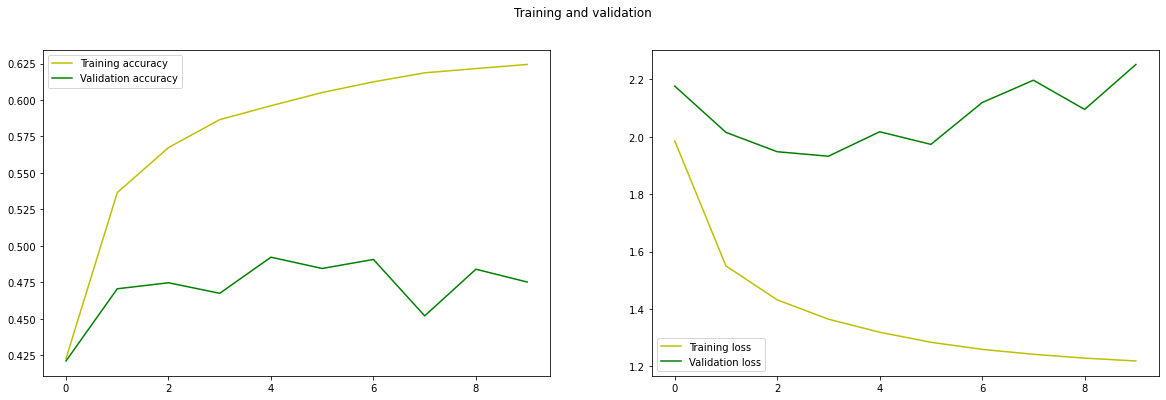

In [23]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [24]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Functions to get next probable characters

In [25]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [26]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [27]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

### Prediction

In [28]:
#Prediction
quotes = [   
    "It is not a lack of  love, but a  lack of friendship that makes unhappy marriages.",
    "Recurrent neural network (RNN)is a type of artificial neural network which uses sequential data or time series data.",
    "Machine learning is the science of getting computers to act without being explicitly programmed.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "The goal of AI is to  make a  compter like humans to solve complex problems.",
    "Statistics are defined as numerical data, and is the field of math that deals with the collection, tabulation and interpretation of numerical data."
    ]

In [29]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of  love, but a  lack o
['f ', 'ne ', 'r ', 'ld ', 'ver ']

recurrent neural network (rnn)is a type 
['and ', 'that ', 'in ', 'which ', 'of ']

machine learning is the science of getti
['ng ', 'on ', 'c ', 'm ', 's ']

deep learning is subset of machine learn
['ed ', ' to ', 'ise ', 'se ', '. ']

the goal of ai is to  make a  compter li
['terate ', 'ne ', 'ke ', 'ght ', 'fe ']

statistics are defined as numerical data
['nt ', 'gers. ', 'l ', 'y ', 'in ']



### Model Has been successfully tested